In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
mini_pieman = niidb.FMriActivationsDb('data/mini_pieman.db',
                                     mask='data/pieman_data/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(mini_pieman.all(), mask='data/pieman_data/wholebrain.nii.gz', num_factors=25, embedding_dim=2)

05/22/2018 15:29:37 Loading Nifti image data/pieman_data/sub-001-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
05/22/2018 15:29:38 Loading Nifti image data/pieman_data/sub-003-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
05/22/2018 15:29:40 Loading Nifti image data/pieman_data/sub-002-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)


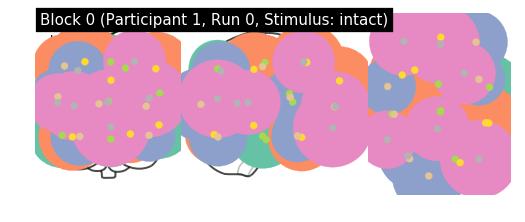

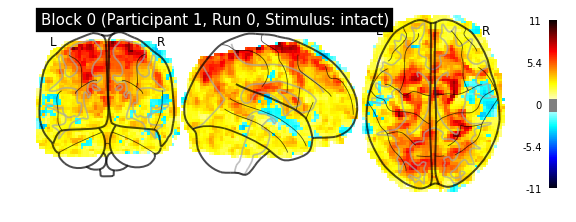

05/22/2018 15:30:25 Reconstruction Error (Frobenius Norm): 6.29853809e+03 out of 5.08479639e+03


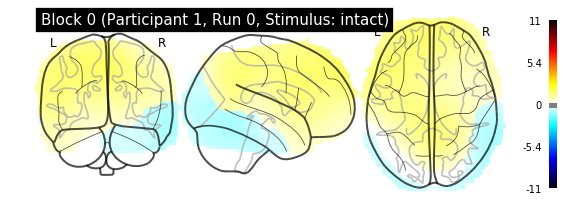

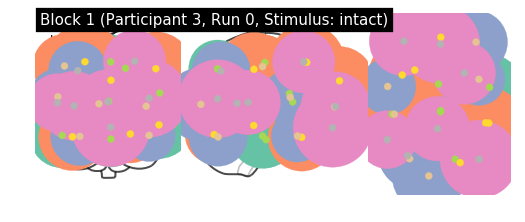

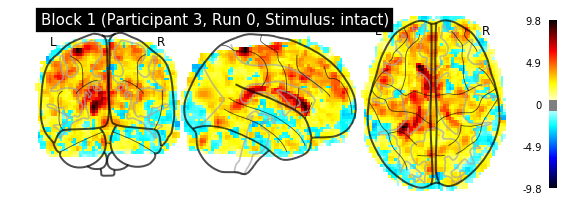

05/22/2018 15:30:50 Reconstruction Error (Frobenius Norm): 6.38811133e+03 out of 5.19534277e+03


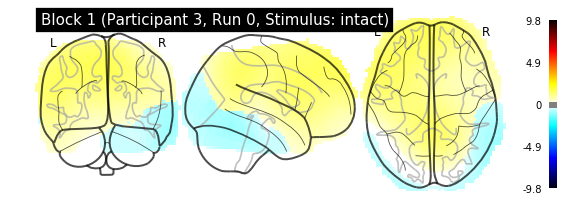

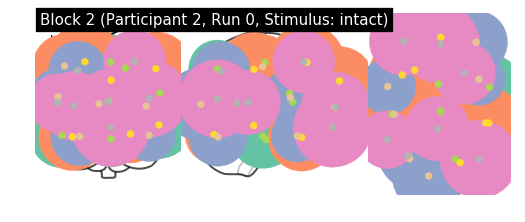

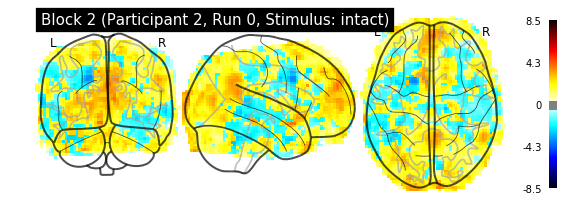

05/22/2018 15:31:15 Reconstruction Error (Frobenius Norm): 6.38811133e+03 out of 5.19534277e+03


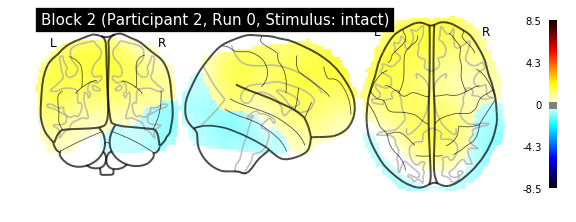

In [6]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)

In [7]:
losses = dtfa.train(num_steps=500, learning_rate=5e-3, log_level=logging.INFO, num_particles=2,
                    batch_size=128, use_cuda=True, checkpoint_steps=10, blocks_batch_size=8, patience=20)

05/22/2018 15:31:16 [Epoch 1] (697ms) Posterior free-energy 1.37214812e+10
05/22/2018 15:31:16 Saving checkpoint...
05/22/2018 15:31:17 [Epoch 2] (572ms) Posterior free-energy 1.23507804e+10
05/22/2018 15:31:17 [Epoch 3] (569ms) Posterior free-energy 1.15736740e+10
05/22/2018 15:31:18 [Epoch 4] (572ms) Posterior free-energy 1.01366559e+10
05/22/2018 15:31:18 [Epoch 5] (602ms) Posterior free-energy 1.03054060e+10
05/22/2018 15:31:19 [Epoch 6] (584ms) Posterior free-energy 9.34656205e+09
05/22/2018 15:31:20 [Epoch 7] (573ms) Posterior free-energy 9.28482816e+09
05/22/2018 15:31:20 [Epoch 8] (568ms) Posterior free-energy 9.03331942e+09
05/22/2018 15:31:21 [Epoch 9] (565ms) Posterior free-energy 9.03333990e+09
05/22/2018 15:31:21 [Epoch 10] (566ms) Posterior free-energy 8.69320806e+09
05/22/2018 15:31:22 [Epoch 11] (563ms) Posterior free-energy 8.57067315e+09
05/22/2018 15:31:22 Saving checkpoint...
05/22/2018 15:31:22 [Epoch 12] (565ms) Posterior free-energy 8.50460979e+09
05/22/2018 15:3

Epoch   129: reducing learning rate of group 0 to 5.0000e-04.


05/22/2018 15:32:30 [Epoch 131] (570ms) Posterior free-energy 7.80119706e+09
05/22/2018 15:32:30 Saving checkpoint...
05/22/2018 15:32:31 [Epoch 132] (567ms) Posterior free-energy 7.78842317e+09
05/22/2018 15:32:32 [Epoch 133] (574ms) Posterior free-energy 7.75309875e+09
05/22/2018 15:32:32 [Epoch 134] (609ms) Posterior free-energy 7.76968397e+09
05/22/2018 15:32:33 [Epoch 135] (601ms) Posterior free-energy 7.75592090e+09
05/22/2018 15:32:33 [Epoch 136] (573ms) Posterior free-energy 7.75332250e+09
05/22/2018 15:32:34 [Epoch 137] (575ms) Posterior free-energy 7.74509363e+09
05/22/2018 15:32:35 [Epoch 138] (581ms) Posterior free-energy 7.74287974e+09
05/22/2018 15:32:35 [Epoch 139] (573ms) Posterior free-energy 7.73265664e+09
05/22/2018 15:32:36 [Epoch 140] (577ms) Posterior free-energy 7.75586816e+09
05/22/2018 15:32:36 [Epoch 141] (571ms) Posterior free-energy 7.73850266e+09
05/22/2018 15:32:36 Saving checkpoint...
05/22/2018 15:32:37 [Epoch 142] (580ms) Posterior free-energy 7.7240586

Epoch   192: reducing learning rate of group 0 to 5.0000e-05.


05/22/2018 15:33:07 [Epoch 194] (579ms) Posterior free-energy 7.71622093e+09
05/22/2018 15:33:07 [Epoch 195] (568ms) Posterior free-energy 7.73612749e+09
05/22/2018 15:33:08 [Epoch 196] (569ms) Posterior free-energy 7.72187341e+09
05/22/2018 15:33:08 [Epoch 197] (584ms) Posterior free-energy 7.72574003e+09
05/22/2018 15:33:09 [Epoch 198] (570ms) Posterior free-energy 7.72736307e+09
05/22/2018 15:33:10 [Epoch 199] (572ms) Posterior free-energy 7.71946547e+09
05/22/2018 15:33:10 [Epoch 200] (576ms) Posterior free-energy 7.70988237e+09
05/22/2018 15:33:11 [Epoch 201] (571ms) Posterior free-energy 7.73342464e+09
05/22/2018 15:33:11 Saving checkpoint...
05/22/2018 15:33:11 [Epoch 202] (575ms) Posterior free-energy 7.71390464e+09
05/22/2018 15:33:12 [Epoch 203] (573ms) Posterior free-energy 7.72637133e+09
05/22/2018 15:33:12 [Epoch 204] (564ms) Posterior free-energy 7.73092864e+09
05/22/2018 15:33:13 [Epoch 205] (564ms) Posterior free-energy 7.73673677e+09
05/22/2018 15:33:14 [Epoch 206] (56

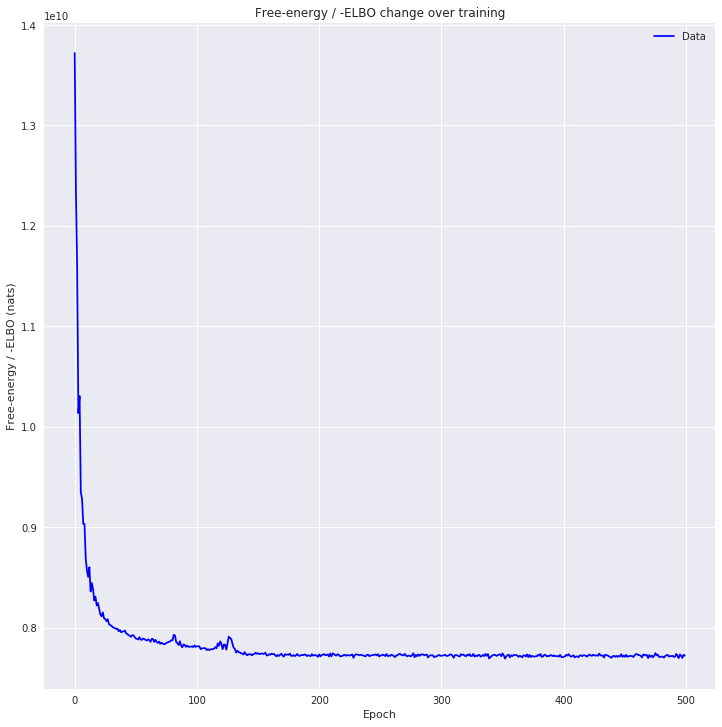

In [8]:
utils.plot_losses(losses)

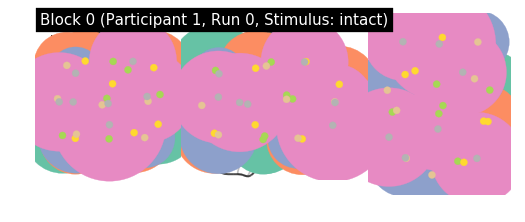

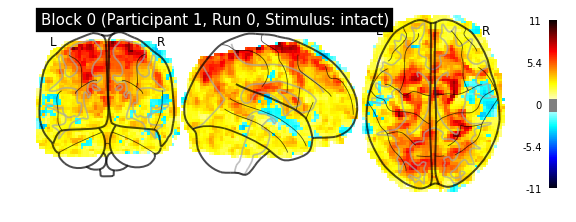

05/22/2018 15:36:27 Reconstruction Error (Frobenius Norm): 5.11841309e+03 out of 5.08479639e+03


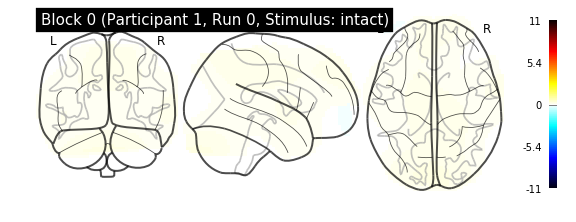

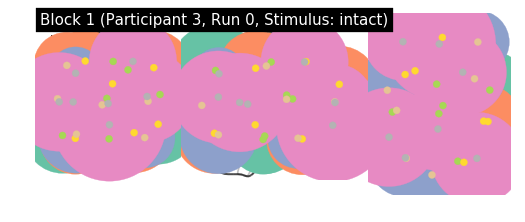

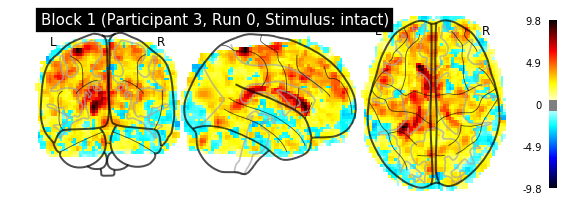

05/22/2018 15:36:51 Reconstruction Error (Frobenius Norm): 5.22789844e+03 out of 5.19534277e+03


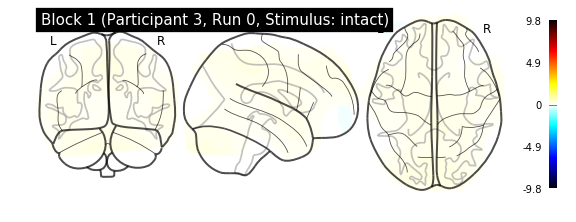

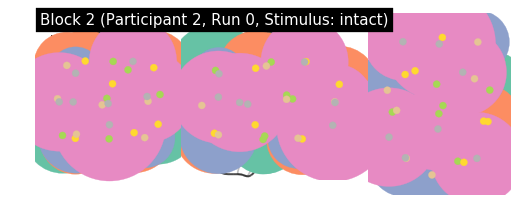

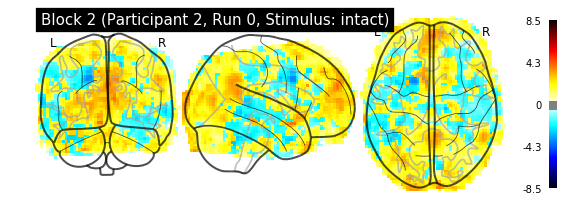

05/22/2018 15:37:16 Reconstruction Error (Frobenius Norm): 5.22693066e+03 out of 5.19534277e+03


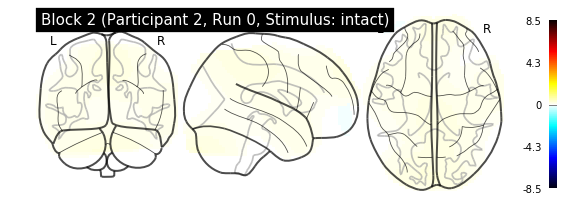

In [9]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)

In [10]:
def task_rest_labeler(block):
    if 'rest' in block.task:
        return 'Rest'
    else:
        return 'Task'

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


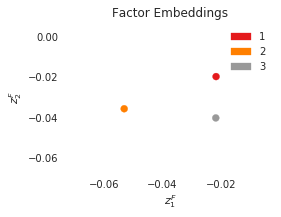

In [11]:
dtfa.scatter_factor_embedding(labeler=lambda block: block.subject)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


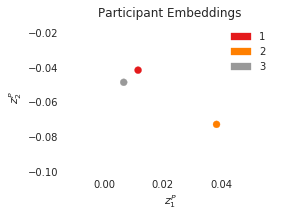

In [12]:
dtfa.scatter_subject_embedding(labeler=lambda block: block.subject)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


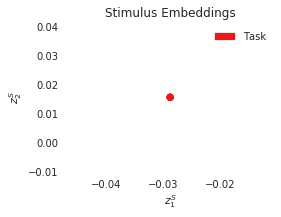

In [13]:
dtfa.scatter_task_embedding(t=None, labeler=task_rest_labeler)